# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [4]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [5]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

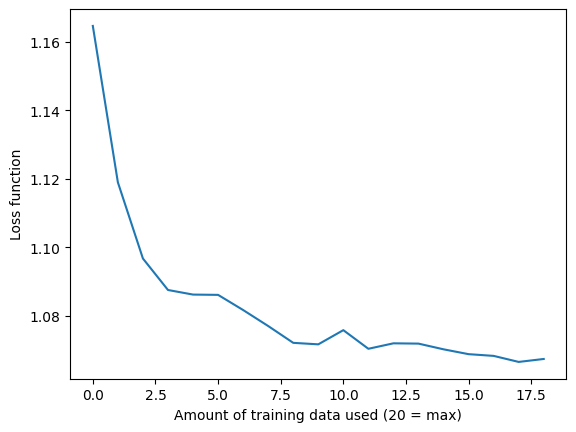

In [6]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [7]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

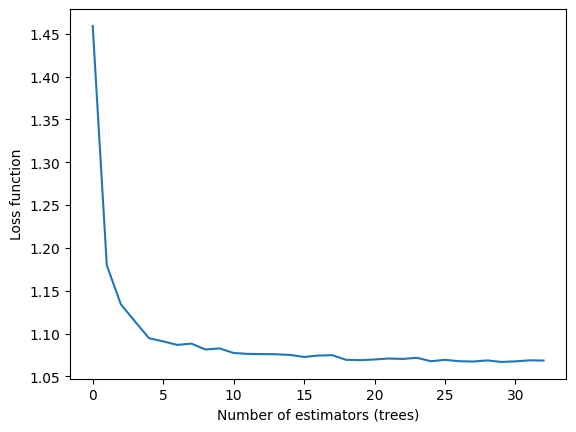

In [8]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

### Answer to Weekly Graph Question

If I had to choose one, I would keep the "number of estimators" graph because it provides a clearer explanation about model tuning: adding more estimators (trees in the forest) can improve accuracy, but also comes with downsides, such as longer training time and potential overfitting. This is an important question when working with Random Forests. On the other hand, the "amount of training data" plot is more general and shows a known pattern - more data often improves performance; however, it is not particularly useful if we would like to know more about model behavior or tuning.



# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

### **1. Vehicle Insurance Fraud Dataset**

A Random Forest model was implemented to detect fraudulent claims using selected features from the Vehicle Insurance Fraud Detection dataset. The model was evaluated using F1 score due to the imbalanced nature of the data, where fraudulent claims make up a small portion of the total (average is about 6% of the entire dataset).

**Baseline model performance:**

The baseline model uses default parameters and no class balancing. Cross-validation was performed using 5 folds, and the model achieved an average F1 score of 0.038. This indicates the model struggled to generalize, even with a non-linear learning method like Random Forest. When evaluated on the test set, the model achieved an F1 score of 0.015, which was lower than random predictions (F1 = 0.05). The test set also showed low precision (0.031) and recall (0.010), indicating the model flagged few fraudulent claims and most predictions were false positives. In contrast, the training performance was much stronger (F1 = 0.623), with high precision (0.917) and moderate recall (0.472), demonstrating significant overfitting. The model learned from the training data but failed to generalize to unseen cases. This warrants hyperparameters tuning and class imbalance handling.

**Hyperparemeters tuning:**

- GridSearchCV was used to automate the search for the best combination of hyperparameters for a RandomForestClassifier, which is well suited for classification tasks like fraud detection. The parameter grid included n_estimators, max_depth, and class_weight to test different model complexities and address class imbalance. The goal was to improve predictive performance, measured by F1 score. The results showed an improvement over the baseline model. The best F1 score achieved during cross-validation was 0.126, compared to the baseline average F1 of approximately 0.038. The optimal parameter combination found by GridSearchCV was: n_estimators = 200, max_depth = 5, and class_weight = 'balanced'. These parameters were applied to tune the model.

- The GridSearchCV-tuned model provided an average F1 score of 0.126 across 5-fold cross-validation. The F1 score on the testing set improved to 0.143, with precision of 0.083 and recall of 0.532. Training performance remained slightly higher, with an F1 of 0.152, pointing to some overfitting. Precision and recall on the training set were 0.087 and 0.601, respectively. In contrast, the baseline model achieved a precision of only 0.031 and recall of 0.010 on the test set; therefore, the tuned model has better accuracy and sensitivity in detecting fraudulent claims. It also outperforms random predictions, which had an F1 of 0.05. The next step was to further improve model performance.

- RandomizedSearchCV was used to explore a broader set of hyperparameters beyond what was tested in GridSearchCV. It showed almost no improvement as the F1 score from 0.126 (GridSearchCV-tuned model) to 0.127. The suggested configuration included n_estimators = 150, max_depth = 5, min_samples_split = 10, min_samples_leaf = 5, and class_weight = 'balanced'. These parameters were applied to tune the model.

- The RandomizedSearchCV-tuned model showed no improvement, and it even performed slightly worse. On the testing set, the F1 score was 0.143, with precision of 0.083 and recall of 0.522, showing the model was able to catch over 52% of fraudulent claims. However, precision was relatively low, 8% (most alerts were still false positives). The F1 on the training set was 0.153, with precision of 0.088 and recall of 0.592, indicating consistent behavior with some overfitting. Below is two columns to illustrate performance of GridSearchCV and RandomizedSearchCV models:


 | Outputs             | GridSearchCV Model   | RandomizedSearchCV  Model      |
 |---------------------|----------------------|----------------------------|
 | F1 score (test)     | 0.143                | 0.143       |
 | Precision (test)    | 0.083                | 0.083       |
 | Recall (test)       | 0.532                | 0.522       |
 | F1 score (train)    | 0.152                | 0.153       |
 | Precision (train)   | 0.087                | 0.088       |
 | Recall (train)      | 0.601                | 0.592       |


The baseline model performed worse than random guessing, achieving an F1 score of only 0.015 compared to 0.051 for random predictions. The tuned models showed a substantial improvement, reaching F1 scores 0.143 on the test set. While this is a clear progress, the model's practical application remains limited as it needs further tuning.

Additional research showed that parameters like max_features, min_samples_split, min_samples_leaf, and the decision threshold can be adjusted to enhance the model. Since RandomizedSearchCV explores a broader parameter space than GridSearchCV, it appears to be a better candidate for the experiment. Below is a comparison before and after these adjustments:

 | Outputs              | RandomizedSearchCV Model | RandomizedSearchCV Model v.2 |
 |----------------------|---------------------------|-------------------------------|
 | F1 score (test)      | 0.143                     | 0.141                        |
 | Precision (test)     | 0.083                     | 0.081                        |
 | Recall (test)        | 0.522                     | 0.517                        |
 | F1 score (train)     | 0.153                     | 0.153                        |
 | Precision (train)    | 0.088                     | 0.088                        |
 | Recall (train)       | 0.592                     | 0.596                        |

Unfortunately, the RandomizedSearchCV Model v.2 didn’t show meaningful improvement despite parameter changes. In fact, it slightly underperformed across all test outputs. The results highlight that further improvement will require feature engineering or more advanced techniques (such as combining XGBoost, SMOTE, and multiple base models), not just hyperparameter tuning. This is a challenge that will be addressed next semester because it is beyond the scope of the current task.


**Conclusion:**

The Random Forest model showed limited but measurable improvement, though its overall performance remained modest even after multiple rounds of tuning. The baseline model performed poorly, with a test F1 score of 0.015, which was lower than random predictions (F1 = 0.05). GridSearchCV tuning improved the F1 to 0.143 with a recall of 53%, but precision remained low at 8%, catching many false positives. RandomizedSearchCV produced similar results (F1 = 0.143), and even after expanded tuning demonstrate in the RandomizedSearchCV model v.2, performance slightly declined (F1 = 0.141). Therefore, it is evident that hyperparameter tuning alone is not enough for applying the model in this specific dataset despite the F1 score reaching 0.143.  More advanced methods such as feature engineering, combining models, and techniques like XGBoost or SMOTE will be explored next semester to better capture fraud patterns in the dataset.



In [9]:
# Load data
fraud_df = pd.read_csv("vehicle_insurance_fraud_detection.csv")

1.1 Baseline Model

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, train_test_split

fraud_df = pd.read_csv("vehicle_insurance_fraud_detection.csv")


# The columns were converted into numerical values.
fraud_df = pd.read_csv("vehicle_insurance_fraud_detection.csv")

# Map for PastNumberOfClaims
claims_map = {
    'none': 0,
    '1': 1,
    '2 to 4': 2,
    'more than 4': 3
}
fraud_df['PastNumberOfClaims_clean'] = (
    fraud_df['PastNumberOfClaims']
    .astype(str)
    .str.strip()
    .map(claims_map)
)

# Map for NumberOfSuppliments
suppl_map = {
    'none': 0,
    '1 to 2': 1,
    '3 to 5': 2,
    'more than 5': 3
}
fraud_df['NumberOfSuppliments_clean'] = (
    fraud_df['NumberOfSuppliments']
    .astype(str)
    .str.strip()
    .map(suppl_map)
)

# Map for Days:Policy-Claim
policy_map = {
    'none': 0,
    '8 to 15': 1,
    '15 to 30': 2,
    'more than 30': 3
}
fraud_df['DaysPolicyClaim_clean'] = (
    fraud_df['Days:Policy-Claim']
    .astype(str)
    .str.strip()
    .map(policy_map)
)

# Output
print("PastNumberOfClaims_clean:", fraud_df['PastNumberOfClaims_clean'].dropna().unique())
print("NumberOfSuppliments_clean:", fraud_df['NumberOfSuppliments_clean'].dropna().unique())
print("DaysPolicyClaim_clean:", fraud_df['DaysPolicyClaim_clean'].dropna().unique())

# Define features
features = [
    'NumberOfSuppliments_clean',
    'PastNumberOfClaims_clean',
    'DaysPolicyClaim_clean',
    'Age',
    'DayOfWeekClaimed',
    'WeekOfMonth'
]

# Encode categorical feature
fraud_df_encoded = pd.get_dummies(fraud_df[features], columns=['DayOfWeekClaimed'], drop_first=True)

# Set X and y
X_fraud = fraud_df_encoded
y_fraud = fraud_df['FraudFound'].map({'No': 0, 'Yes': 1})  # binary target

# Create and evaluate model
rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf, X_fraud, y_fraud, cv=5, scoring='f1')

# Train/test split and model training
X_train, X_test, y_train, y_test = train_test_split(X_fraud, y_fraud, test_size=0.2, random_state=42)
rf.fit(X_train, y_train)

# F1 on train and test
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Baseline model results:")
print("F1 score on training data:", f1_score(y_train, y_pred_train))
print("Precision on training data:", precision_score(y_train, y_pred_train))
print("Recall on training data:", recall_score(y_train, y_pred_train))

print("F1 score on testing data:", f1_score(y_test, y_pred_test))
print("Precision on testing data:", precision_score(y_test, y_pred_test))
print("Recall on testing data:", recall_score(y_test, y_pred_test))

# F1 with random predictions
y_test_shuffled = y_test.sample(frac=1.0, random_state=42).reset_index(drop=True)
print("F1 score with random predictions:", f1_score(y_test.reset_index(drop=True), y_test_shuffled))

# Output
print("Cross-validated F1 scores:", scores)
print("Average F1 score:", scores.mean())


PastNumberOfClaims_clean: [0 1 2 3]
NumberOfSuppliments_clean: [0 3 2 1]
DaysPolicyClaim_clean: [3 2 1 0]
Baseline model results:
F1 score on training data: 0.6236363636363637
Precision on training data: 0.9171122994652406
Recall on training data: 0.4724517906336088
F1 score on testing data: 0.015384615384615385
Precision on testing data: 0.031746031746031744
Recall on testing data: 0.01015228426395939
F1 score with random predictions: 0.050761421319796954
Cross-validated F1 scores: [0.03252033 0.02264151 0.04633205 0.03802281 0.05426357]
Average F1 score: 0.03875605210978929


1.2 Hyperparameter Tuning by GridSearchCV

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Small grid for faster testing
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5,      
    n_jobs=-1
)

grid_search.fit(X_fraud, y_fraud)

print("Best F1 score:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

Best F1 score: 0.1260316090575358
Best parameters: {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 200}


1.3 Evaluation of GridSearchCV-Tuned Model

In [12]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Improved model with tuning and class balancing
rf_balanced = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)

# Cross-validation
scores_balanced = cross_val_score(rf_balanced, X_fraud, y_fraud, cv=5, scoring='f1')
print("Cross-validated F1 scores (tuned):", scores_balanced)
print("Average F1 score (tuned):", scores_balanced.mean())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_fraud, y_fraud, test_size=0.2, random_state=42)
rf_balanced.fit(X_train, y_train)

# F1 on train and test
y_pred_train = rf_balanced.predict(X_train)
y_pred_test = rf_balanced.predict(X_test)

print("F1 score on training data (tuned):", f1_score(y_train, y_pred_train))
print("Precision on training data (tuned):", precision_score(y_train, y_pred_train))
print("Recall on training data (tuned):", recall_score(y_train, y_pred_train))

print("F1 score on testing data (tuned):", f1_score(y_test, y_pred_test))
print("Precision on testing data (tuned):", precision_score(y_test, y_pred_test))
print("Recall on testing data (tuned):", recall_score(y_test, y_pred_test))

# F1 with random predictions
y_test_shuffled = y_test.sample(frac=1.0, random_state=42).reset_index(drop=True)
print("F1 score with random predictions (baseline):", f1_score(y_test.reset_index(drop=True), y_test_shuffled))

Cross-validated F1 scores (tuned): [0.1332324  0.12349914 0.12718601 0.11819596 0.12804454]
Average F1 score (tuned): 0.1260316090575358
F1 score on training data (tuned): 0.15223828601288975
Precision on training data (tuned): 0.08713858424725822
Recall on training data (tuned): 0.6019283746556474
F1 score on testing data (tuned): 0.1437371663244353
Precision on testing data (tuned): 0.08306962025316456
Recall on testing data (tuned): 0.5329949238578681
F1 score with random predictions (baseline): 0.050761421319796954


1.4 Hyperparameter Tuning by RandomizedSearchCV

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Expanded parameter space
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'class_weight': ['balanced']
}

# Randomized search (10 combinations)
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_fraud, y_fraud)

print("Best F1 score:", random_search.best_score_)
print("Best parameters:", random_search.best_params_)

Best F1 score: 0.12756182801485763
Best parameters: {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 5, 'class_weight': 'balanced'}


1.5 Evaluation of RandomizedSearchCV-Tuned Model

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score

# Final model with best-found parameters
rf_final = RandomForestClassifier(
    n_estimators=150,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

# Cross-validation to verify
cv_scores_final = cross_val_score(rf_final, X_fraud, y_fraud, cv=5, scoring='f1')
print("RandomizedSearchCV-tuned model results:")
print("Cross-validated F1 scores (final):", cv_scores_final)
print("Average F1 score (final):", cv_scores_final.mean())

# Train/test split and training
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_fraud, y_fraud, test_size=0.2, random_state=42
)
rf_final.fit(X_train_final, y_train_final)

# F1 scores on train and test sets
y_pred_train_final = rf_final.predict(X_train_final)
print("F1 score on training data (final):", f1_score(y_train_final, y_pred_train_final))
print("Precision on training data (final):", precision_score(y_train_final, y_pred_train_final))
print("Recall on training data (final):", recall_score(y_train_final, y_pred_train_final))

y_pred_test_final = rf_final.predict(X_test_final)
print("F1 score on testing data (final):", f1_score(y_test_final, y_pred_test_final))
print("Precision on testing data (final):", precision_score(y_test_final, y_pred_test_final))
print("Recall on testing data (final):", recall_score(y_test_final, y_pred_test_final))

# Baseline random predictions
y_test_shuffled = y_test_final.sample(frac=1.0, random_state=42).reset_index(drop=True)
print("F1 score with random predictions (baseline):", f1_score(y_test_final.reset_index(drop=True), y_test_shuffled))


RandomizedSearchCV-tuned model results:
Cross-validated F1 scores (final): [0.12917595 0.13028765 0.12121212 0.11985019 0.13728324]
Average F1 score (final): 0.12756182801485763
F1 score on training data (final): 0.1535440099982146
Precision on training data (final): 0.0882051282051282
Recall on training data (final): 0.5922865013774105
F1 score on testing data (final): 0.14335421016005567
Precision on testing data (final): 0.08306451612903226
Recall on testing data (final): 0.5228426395939086
F1 score with random predictions (baseline): 0.050761421319796954


1.6 Evaluation of RandomizedSearchCV-Tuned Model v.2

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score

# Adjusted parameters
rf_final = RandomForestClassifier(
    n_estimators=150,
    max_depth=5,
    min_samples_split=15,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

# Cross-validation
cv_scores_final = cross_val_score(rf_final, X_fraud, y_fraud, cv=5, scoring='f1')
print("Adjusted RandomForest model results:")
print("Cross-validated F1 scores (final):", cv_scores_final)
print("Average F1 score (final):", cv_scores_final.mean())

# Train/test split and training
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_fraud, y_fraud, test_size=0.2, random_state=42
)
rf_final.fit(X_train_final, y_train_final)

y_pred_train_final = rf_final.predict(X_train_final)
print("F1 score on training data (final):", f1_score(y_train_final, y_pred_train_final))
print("Precision on training data (final):", precision_score(y_train_final, y_pred_train_final))
print("Recall on training data (final):", recall_score(y_train_final, y_pred_train_final))

y_pred_test_final = rf_final.predict(X_test_final)
print("F1 score on testing data (final):", f1_score(y_test_final, y_pred_test_final))
print("Precision on testing data (final):", precision_score(y_test_final, y_pred_test_final))
print("Recall on testing data (final):", recall_score(y_test_final, y_pred_test_final))

# Baseline random predictions
y_test_shuffled = y_test_final.sample(frac=1.0, random_state=42).reset_index(drop=True)
print("F1 score with random predictions (baseline):", f1_score(y_test_final.reset_index(drop=True), y_test_shuffled))


Adjusted RandomForest model results:
Cross-validated F1 scores (final): [0.13095238 0.12758906 0.12648221 0.12198795 0.13593637]
Average F1 score (final): 0.1285895960405132
F1 score on training data (final): 0.15357332860436249
Precision on training data (final): 0.08813352330551598
Recall on training data (final): 0.5964187327823691
F1 score on testing data (final): 0.14107883817427386
Precision on testing data (final): 0.08166533226581266
Recall on testing data (final): 0.5177664974619289
F1 score with random predictions (baseline): 0.050761421319796954


### **2. Insurance Claims Dataset**


A Random Forest model was implemented to detect fraudulent claims using selected features from the Insurance Claims dataset. As with Vehicle Insurance Fraud Dataset, the model was evaluated using F1 score due to the imbalanced nature of the data, where fraudulent claims make up a small portion of the total. 

**Baseline model performance:**

The baseline model uses default parameters and no class balancing. It achieves an average F1 score of 0.067 across 5-fold cross-validation. The F1 score with random predictions was at 0.236, and the F1 score on the testing set was, 0.058, while the model completely overfit the training data as F1 equaled 1.0. Precision and recall on the training set unsurprisingly showed 1.0 because of the overfit. At the same time, the model had precision of 0.153 and recall of 0.036 on the test set, indicating its poor performance. As a result, the baseline model struggled to detect fraudulent claims, which warrants hyperparameters tuning and class imbalance handling.

**Hyperparemeters tuning:**

-  GridSearchCV was used to automate the search for the best combination of hyperparameters. RandomForestClassifier was applied because it is intended for classification tasks like fraud detection. The parameter grid included n_estimators, max_depth, and class_weight to test different model complexities and address class imbalance. The goal was to improve predictive performance, measured by F1 score. The results were far better than the baseline model showed. The best F1 score achieved during cross-validation was 0.344, compared to the baseline average F1 of approximately 0.067. The optimal parameter combination found by GridSearchCV was: n_estimators = 200, max_depth = 5, and class_weight = 'balanced'. These parameters were applied to tune the model.

- The GridSearchCV-tuned model improved. It provided an average F1 score of 0.337 across 5-fold cross-validation. The F1 score on the testing set improved to 0.388, with precision of 0.329 and recall of 0.472. Training performance remained stronger, with an F1 of 0.670, pointing to some overfitting, though reduced compared to the baseline. In contrast, the baseline model achieved a precision of only 0.153 and recall of 0.036 on the test set; therefore, the tuned model has the better accuracy and sensitivity of fraudulent claim detection. It also outperforms random predictions, which had an F1 of 0.236. The next step was to further improve model performance.

- RandomizedSearchCV was used to explore a broader set of hyperparameters beyond what was tested in GridSearchCV. RandomizedSearchCV helped move the F1 score from 0.337 in the earlier tuned model to 0.385. The best configuration included n_estimators = 300, max_depth = 3, min_samples_split = 5, min_samples_leaf = 1, and class_weight = 'balanced'. This step allowed to refine the model by balancing complexity and generalization more effectively than GridSearchCV.

- The final model uses parameters selected identified by RandomizedSearchCV. On the testing set, the F1 score improved to 0.464, with precision of 0.330 and recall of 0.781, showing the model was able to catch 78% of fraudulent claims. However, precision was relatively low, 33%, which means that roughly 2 out of 3 are fraudulent claim alerts are false positives. This is not necessarily a drawback because in practice flagged claims would likely be manually reviewed, so false positives are acceptable if actual fraudulent claims are not missed - and the model performs well in that regard. The F1 on the training set was 0.486, with higher recall of 0.869 and precision of 0.338, demonstrating that the model generalized well without severe overfitting. Thus, this final model represents the best balance between precision and recall, outperforming both the baseline and the GridSearchCV-tuned models.


**Conclusion:**

The Random Forest model showed clear and consistent improvement across tuning stages. The baseline model performed poorly, with an average F1 score of just 0.067 and a recall of 3.6% on the test set. After applying GridSearchCV, the F1 improved to 0.388 on the test set, and RandomizedSearchCV further raised it to 0.464. The final model achieved a recall of 78%, successfully detecting most fraudulent claims, and a precision of 33%, indicating that about one in three flagged claims were actually fraudulent. This tradeoff is acceptable in practical settings where flagged claims are manually reviewed. With strong recall, reduced overfitting (training F1 = 0.486), and a significant jump from the random baseline (F1 = 0.236), the final model demonstrates solid performance for fraudulent claims detection. Further model tuning is possible by applying more advanced techniques like XGBoost or SMOTE, and these may be explored in more detail next semester.

In [16]:
# Load data
claims_df = pd.read_csv("insurance_claims.csv") 

2.1 Baseline Model

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, train_test_split


claims_df = pd.read_csv("insurance_claims.csv") 

# Selected features
features = [
    'vehicle_claim', 'injury_claim', 'property_claim',
    'age', 'policy_annual_premium', 'incident_hour_of_the_day'
]

# Drop rows with missing values
claims_df = claims_df.dropna(subset=features + ['fraud_reported'])

# Set X and y
X_claims = claims_df[features]
y_claims = claims_df['fraud_reported'].map({'N': 0, 'Y': 1})  # Binary target

# Cross-validation with default Random Forest
rf_claims = RandomForestClassifier(random_state=42)
scores_claims = cross_val_score(rf_claims, X_claims, y_claims, cv=5, scoring='f1')

# Train/test split
X_train_claims, X_test_claims, y_train_claims, y_test_claims = train_test_split(
    X_claims, y_claims, test_size=0.2, random_state=42
)
rf_claims.fit(X_train_claims, y_train_claims)

# Evaluation
print("Baseline model results:")
print("F1 score on training data:", f1_score(y_train_claims, rf_claims.predict(X_train_claims)))
print("Precision on training data:", precision_score(y_train_claims, rf_claims.predict(X_train_claims)))
print("Recall on training data:", recall_score(y_train_claims, rf_claims.predict(X_train_claims)))

print("F1 score on testing data:", f1_score(y_test_claims, rf_claims.predict(X_test_claims)))
print("Precision on testing data:", precision_score(y_test_claims, rf_claims.predict(X_test_claims)))
print("Recall on testing data:", recall_score(y_test_claims, rf_claims.predict(X_test_claims)))


# F1 with random predictions
y_test_shuffled = y_test_claims.sample(frac=1.0, random_state=42).reset_index(drop=True)
print("F1 score with random predictions:", f1_score(y_test_claims.reset_index(drop=True), y_test_shuffled))

# Cross-validation results
print("Cross-validated F1 scores:", scores_claims)
print("Average F1 score:", scores_claims.mean())


Baseline model results:
F1 score on training data: 1.0
Precision on training data: 1.0
Recall on training data: 1.0
F1 score on testing data: 0.058823529411764705
Precision on testing data: 0.15384615384615385
Recall on testing data: 0.03636363636363636
F1 score with random predictions: 0.23636363636363636
Cross-validated F1 scores: [0.03333333 0.09375    0.10526316 0.03278689 0.07017544]
Average F1 score: 0.0670617630140926


2.2 Hyperparameter Tuning by GridSearchCV

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Grid for testing class balance and tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# Use X_claims and y_claims from Insurance Claims Dataset
grid_search.fit(X_claims, y_claims)

# Output best model details
print("Best F1 score:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)


Best F1 score: 0.3446608754408305
Best parameters: {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 100}


2.3 Evaluation of GridSearchCV-Tuned Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score

# Use best parameters from GridSearchCV
rf_claims_balanced = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)

# Cross-validation
scores_claims_balanced = cross_val_score(
    rf_claims_balanced, X_claims, y_claims, cv=5, scoring='f1'
)
print("GridSearchCV-Tuned model results:")
print("Cross-validated F1 scores (tuned):", scores_claims_balanced)
print("Average F1 score (tuned):", scores_claims_balanced.mean())

# Train/test split
X_train_claims, X_test_claims, y_train_claims, y_test_claims = train_test_split(
    X_claims, y_claims, test_size=0.2, random_state=42
)
rf_claims_balanced.fit(X_train_claims, y_train_claims)

# F1 on train and test
y_pred_train = rf_claims_balanced.predict(X_train_claims)
print("F1 score on training data (tuned):", f1_score(y_train_claims, rf_claims_balanced.predict(X_train_claims)))
print("Precision on training data (tuned):", precision_score(y_train_claims, y_pred_train))
print("Recall on training data (tuned):", recall_score(y_train_claims, y_pred_train))

y_pred_test = rf_claims_balanced.predict(X_test_claims)
print("F1 score on testing data (tuned):", f1_score(y_test_claims, rf_claims_balanced.predict(X_test_claims)))
print("Precision on testing data (tuned):", precision_score(y_test_claims, y_pred_test))
print("Recall on testing data (tuned):", recall_score(y_test_claims, y_pred_test))

# F1 with random predictions (baseline)
y_test_shuffled = y_test_claims.sample(frac=1.0, random_state=42).reset_index(drop=True)
print("F1 score with random predictions (baseline):", f1_score(y_test_claims.reset_index(drop=True), y_test_shuffled))


GridSearchCV-Tuned model results:
Cross-validated F1 scores (tuned): [0.34782609 0.35211268 0.32167832 0.30252101 0.36090226]
Average F1 score (tuned): 0.3370080697467281
F1 score on training data (tuned): 0.6706586826347305
Precision on training data (tuned): 0.5436893203883495
Recall on training data (tuned): 0.875
F1 score on testing data (tuned): 0.3880597014925373
Precision on testing data (tuned): 0.3291139240506329
Recall on testing data (tuned): 0.4727272727272727
F1 score with random predictions (baseline): 0.23636363636363636


2.4 Hyperparameter Tuning by RandomizedSearchCV

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Expanded parameter space
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'class_weight': ['balanced']
}

# Randomized search (10 combinations)
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_claims, y_claims)

print("Best F1 score:", random_search.best_score_)
print("Best parameters:", random_search.best_params_)


Best F1 score: 0.385245178153266
Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 3, 'class_weight': 'balanced'}


2.5 Evaluation of RandomizedSearchCV-Tuned Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score

# Final model with best-found parameters
rf_final = RandomForestClassifier(
    n_estimators=300,
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

# Cross-validation to verify
cv_scores_final = cross_val_score(rf_final, X_claims, y_claims, cv=5, scoring='f1')
print("RandomizedSearchCV-tuned model results:")
print("Cross-validated F1 scores (final):", cv_scores_final)
print("Average F1 score (final):", cv_scores_final.mean())

# Train/test split and training
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_claims, y_claims, test_size=0.2, random_state=42
)
rf_final.fit(X_train_final, y_train_final)

# F1 scores on train and test sets
y_pred_train_final = rf_final.predict(X_train_final)
print("F1 score on training data (final):", f1_score(y_train_final, rf_final.predict(X_train_final)))
print("Precision on training data (final):", precision_score(y_train_final, y_pred_train_final))
print("Recall on training data (final):", recall_score(y_train_final, y_pred_train_final))

y_pred_test_final = rf_final.predict(X_test_final)
print("F1 score on testing data (final):", f1_score(y_test_final, y_pred_test_final))
print("Precision on testing data (final):", precision_score(y_test_final, y_pred_test_final))
print("Recall on testing data (final):", recall_score(y_test_final, y_pred_test_final))

# Baseline random predictions
y_test_shuffled = y_test_final.sample(frac=1.0, random_state=42).reset_index(drop=True)
print("F1 score with random predictions (baseline):", f1_score(y_test_final.reset_index(drop=True), y_test_shuffled))


RandomizedSearchCV-tuned model results:
Cross-validated F1 scores (final): [0.43678161 0.41081081 0.35714286 0.34939759 0.37209302]
Average F1 score (final): 0.385245178153266
F1 score on training data (final): 0.4868804664723032
Precision on training data (final): 0.33805668016194335
Recall on training data (final): 0.8697916666666666
F1 score on testing data (final): 0.4648648648648649
Precision on testing data (final): 0.33076923076923076
Recall on testing data (final): 0.7818181818181819
F1 score with random predictions (baseline): 0.23636363636363636


# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

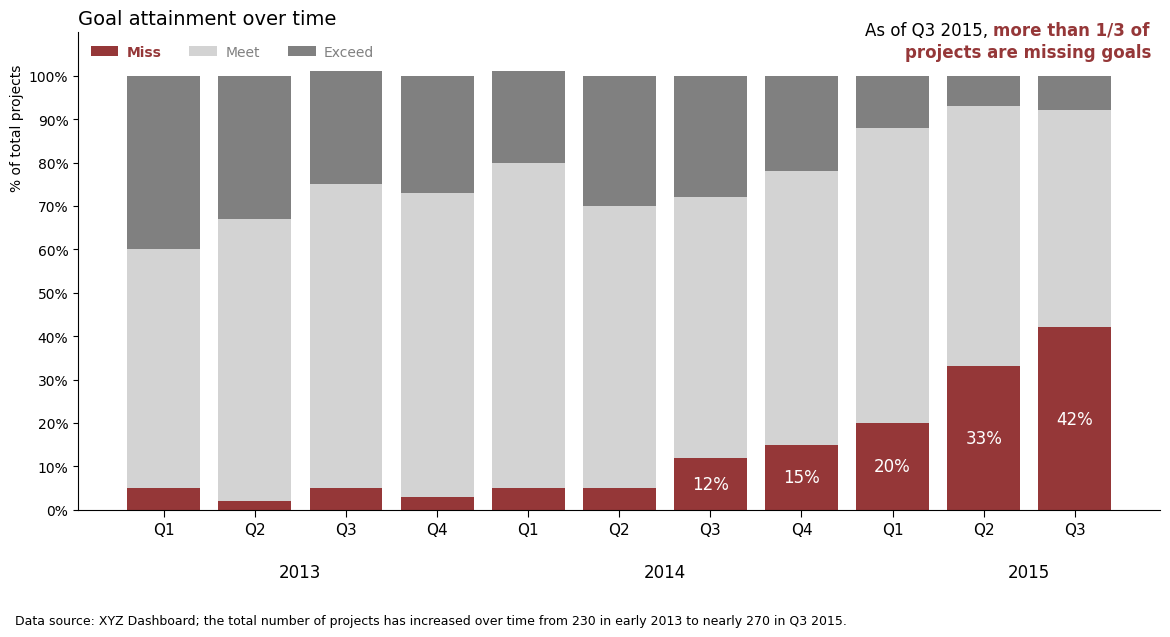

In [22]:
import matplotlib.ticker as mtick

# Apply percentage formatting to y-axis
fig, ax = plt.subplots(figsize=(12, 6))

# Data
quarters = ['Q1', 'Q2', 'Q3', 'Q4', 'Q1', 'Q2', 'Q3', 'Q4', 'Q1', 'Q2', 'Q3']
miss =     [5, 2, 5, 3, 5, 5, 12, 15, 20, 33, 42]
meet =     [55, 65, 70, 70, 75, 65, 60, 63, 68, 60, 50]
exceed =   [40, 33, 26, 27, 21, 30, 28, 22, 12, 7, 8]
x = np.arange(len(quarters))

# Bars
ax.bar(x, miss, label='Miss', color='#953738')
ax.bar(x, meet, bottom=miss, label='Meet', color='lightgray')
ax.bar(x, exceed, bottom=np.array(miss)+np.array(meet), label='Exceed', color='gray')

# Miss % labels
for i, value in enumerate(miss):
    if value >= 10:
        ax.text(x[i], value / 2, f'{value}%', ha='center', va='center', color='white', fontsize=12)

# X-axis
ax.set_xticks(x)
ax.set_xticklabels(quarters, fontsize=11)

# Year
year_labels = ['2013', '2014', '2015']
year_positions = [1.5, 5.5, 9.5]
for xpos, year in zip(year_positions, year_labels):
    ax.text(xpos, -0.15, year, ha='center', va='bottom', fontsize=12, transform=ax.get_xaxis_transform())

# Y-axis with percentage formatting
ax.set_ylabel('% of total projects')
ax.set_ylim(0, 110)
ax.set_yticks(np.arange(0, 110, 10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_label_coords(-0.05, 0.8)

# Title
ax.set_title('Goal attainment over time', fontsize=14, loc='left')

# Legend 
legend = ax.legend(loc='upper left', frameon=False, ncol=3, handletextpad=0.6)
legend.get_texts()[0].set_fontweight('bold')
legend.get_texts()[0].set_color('#953738')
legend.get_texts()[1].set_color('gray')
legend.get_texts()[2].set_color('gray')

# Annotation
ax.text(7.7, 109.5, 'As of Q3 2015, ', fontsize=12, color='black')
ax.text(9.1, 109.5, 'more than 1/3 of', fontsize=12, color='#953738', weight='bold')
ax.text(8.14, 104.4, 'projects are missing goals', fontsize=12, color='#953738', weight='bold')

# Format
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', length=5)
ax.grid(False)

# Source
fig.text(0.01, -0.05, 'Data source: XYZ Dashboard; the total number of projects has increased over time from 230 in early 2013 to nearly 270 in Q3 2015.',
         fontsize=9)

plt.tight_layout()
plt.show()
